In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error
import codesModel as codeM


In [2]:
# Opciones de pandas
rows, cols = 50, 50
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
data = pd.read_csv('data_technical_clean.csv', header=[0,1], index_col=0)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m-%d'), inplace=True)
data

Attributes       Close                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-05    1.655797   3.107232   14.095586    2.738583    1.164987   
1985-03-06    1.642262   3.088737   13.873695    2.759651    1.147157   
1985-03-07    1.637751   3.033250   13.586567    2.822849    1.144183   
1985-03-08    1.619704   3.005508   13.534367    2.775449    1.141212   
1985-03-11    1.588121   2.977763   13.730146    2.764918    1.144183   
...                ...        ...         ...         ...         ...   
2020-12-22  245.899994  91.573029  121.980003  229.573318  144.020004   
2020-12-23  244.250000  92.720818  122.266174  232.182770  144.410004   
2020-12-24  247.990005  92.690872  123.045761  233.447678  145.059998   
2020-12-28  248.149994  93.110062  123.174042  235.758347  146.910004   
2020-12-29  248.350006  91.982246  122.167496  233.049286  147.419998   

Attributes   CloseNext                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-05    1.642262   3.088737   13.873695    2.759651    1.147157   
1985-03-06    1.637751   3.033250   13.586567    2.822849    1.144183   
1985-03-07    1.619704   3.005508   13.534367    2.775449    1.141212   
1985-03-08    1.588121   2.977763   13.730146    2.764918    1.144183   
1985-03-11    1.606167   3.060992   13.769285    2.764918    1.159043   
...                ...        ...         ...         ...         ...   
2020-12-22  244.250000  92.720818  122.266174  232.182770  144.410004   
2020-12-23  247.990005  92.690872  123.045761  233.447678  145.059998   
2020-12-24  248.149994  93.110062  123.174042  235.758347  146.910004   
2020-12-28  248.350006  91.982246  122.167496  233.049286  147.419998   
2020-12-29  246.679993  93.030212  122.700371  235.031281  147.309998   

Attributes   Volume                                          bop             \
Symbol          BDX      GL      IBM      NSC      PEP       BDX         GL   
1985-03-05   576000  378000  4040000  1125900  5153400 -0.624992  42.000023   
1985-03-06   923200  450225  4120000  1773900  3722400 -0.857135  55.666877   
1985-03-07  1408000   71550  7028000   770400  4624200 -0.249985  54.666638   
1985-03-08   987200   69525  6892000  3031200  2764800 -0.666667  81.250315   
1985-03-11   692800  648675  4204000   936900  1609200 -0.750000  32.200041   
...             ...     ...      ...      ...      ...       ...        ...   
2020-12-22   941100  447600  4336100   806200  2653700 -0.464618  -0.358210   
2020-12-23   919500  554300  2693900  1209200  2645100 -0.927869   0.519739   
2020-12-24   440000   76100  1761100   383100   883300  0.710346  -0.255953   
2020-12-28   644500  345500  3615200   785100  2493500 -0.251941  -0.086706   
2020-12-29   817000  514800  3487000   929900  3186700 -0.305475  -0.923078   

Attributes                                    ema200                         \
Symbol           IBM       NSC       PEP         BDX         GL         IBM   
1985-03-05 -0.300000 -0.142862  0.700006    1.720674   3.251535   14.185128   
1985-03-06 -0.818182  0.363643 -0.749982    1.719894   3.249915   14.182029   
1985-03-07 -0.666667  1.000000  0.142847    1.719077   3.247759   14.176104   
1985-03-08 -0.466667 -0.875001 -0.400007    1.718088   3.245349   14.169718   
1985-03-11  0.812500 -0.250000 -0.333371    1.716795   3.242686   14.165344   
...              ...       ...       ...         ...        ...         ...   
2020-12-22  0.165748  0.247494 -0.381579  242.654200  85.275914  119.399113   
2020-12-23  0.013608  0.324324 -0.052289  242.670079  85.349993  119.427641   
2020-12-24 -0.348312  0.353474  0.237109  242.723013  85.423037  119.463642   
2020-12-28 -0.130841  0.149392  0.548543  242.777013  85.499524  119.500561   
2020-12-29 -0.691961 -0.496620 -0.134712  242.832466  85.564029  119.527098   

Attributes                              macd

## 1) Modelo donde escalamos solo las variables independientes

In [3]:
X = data.drop(['CloseNext'], level=0, axis=1)
y = data['CloseNext']

In [4]:
def dfM(stockName, X):
    scaler = StandardScaler()
    Xsc = scaler.fit_transform(X.xs(stockName, level=1, axis=1))
    df = pd.DataFrame(data = Xsc, columns = X.xs(stockName, level=1, axis=1).columns, index=X.xs(stockName, level=1, axis=1).index)
    df['CloseNext'] = y[stockName].values
    return df

In [5]:
stock_sel = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
data_scaler = pd.DataFrame()
for stock in stock_sel:
    df2 = dfM(stock, X) 
    df2.columns = pd.MultiIndex.from_product([df2.columns, [stock]], names=['Attributes', 'Symbol'])
    data_scaler = pd.concat([data_scaler, df2], axis=1).sort_index(axis=1)

data_scaler

Attributes     Close                                           CloseNext  \
Symbol           BDX        GL       IBM       NSC       PEP         BDX   
1985-03-05 -0.827281 -0.839889 -1.073245 -0.796551 -1.079229    1.642262   
1985-03-06 -0.827475 -0.840615 -1.077965 -0.796121 -1.079732    1.637751   
1985-03-07 -0.827539 -0.842794 -1.084072 -0.794829 -1.079816    1.619704   
1985-03-08 -0.827797 -0.843884 -1.085183 -0.795798 -1.079899    1.588121   
1985-03-11 -0.828249 -0.844974 -1.081018 -0.796013 -1.079816    1.606167   
...              ...       ...       ...       ...       ...         ...   
2020-12-22  2.666565  2.634794  1.221644  3.839015  2.945634  244.250000   
2020-12-23  2.642963  2.679876  1.227731  3.892342  2.956622  247.990005   
2020-12-24  2.696462  2.678700  1.244314  3.918191  2.974935  248.149994   
2020-12-28  2.698751  2.695165  1.247043  3.965412  3.027058  248.350006   
2020-12-29  2.701612  2.650867  1.225632  3.910050  3.041427  246.679993   

Attributes                                                   Volume            \
Symbol             GL         IBM         NSC         PEP       BDX        GL   
1985-03-05   3.088737   13.873695    2.759651    1.147157 -0.719720 -0.594723   
1985-03-06   3.033250   13.586567    2.822849    1.144183 -0.242853 -0.508574   
1985-03-07   3.005508   13.534367    2.775449    1.141212  0.423002 -0.960252   
1985-03-08   2.977763   13.730146    2.764918    1.144183 -0.154951 -0.962667   
1985-03-11   3.060992   13.769285    2.764918    1.159043 -0.559299 -0.271866   
...               ...         ...         ...         ...       ...       ...   
2020-12-22  92.720818  122.266174  232.182770  144.410004 -0.218268 -0.511705   
2020-12-23  92.690872  123.045761  233.447678  145.059998 -0.247935 -0.384435   
2020-12-24  93.110062  123.174042  235.758347  146.910004 -0.906511 -0.954825   
2020-12-28  91.982246  122.167496  233.049286  147.419998 -0.625637 -0.633488   
2020-12-29  93.030212  122.700371  235.031281  147.309998 -0.388715 -0.431550   

Attributes                                     bop                      \
Symbol           IBM       NSC       PEP       BDX        GL       IBM   
1985-03-05 -0.696469 -0.370145  0.178135 -1.156526  2.141280 -0.582557   
1985-03-06 -0.678160  0.101955 -0.369045 -1.572225  2.916646 -1.541034   
1985-03-07 -0.012646 -0.629145 -0.024218 -0.484997  2.859899 -1.260778   
1985-03-08 -0.043771  1.017961 -0.735208 -1.231152  4.368079 -0.890839   
1985-03-11 -0.658936 -0.507841 -1.177081 -1.380377  1.585294  1.475225   
...              ...       ...       ...       ...       ...       ...   
2020-12-22 -0.628705 -0.603063 -0.777690 -0.869343 -0.261843  0.278933   
2020-12-23 -1.004532 -0.309457 -0.780978 -1.698887 -0.212034 -0.002479   
2020-12-24 -1.218010 -0.911313 -1.454648  1.234673 -0.256042 -0.671920   
2020-12-28 -0.793687 -0.618435 -0.838946 -0.488501 -0.246440 -0.269665   
2020-12-29 -0.823026 -0.512941 -0.573883 -0.584364 -0.293890 -1.307564   

Attributes                        ema200                                \
Symbol           NSC       PEP       BDX        GL       IBM       NSC   
1985-03-05 -0.299008  1.250722 -0.821408 -0.829413 -1.058602 -0.809074   
1985-03-06  0.633997 -1.535893 -0.821420 -0.829480 -1.058669 -0.809076   
1985-03-07  1.806196  0.179964 -0.821432 -0.829568 -1.058797 -0.809065   
1985-03-08 -1.647641 -0.863304 -0.821447 -0.829666 -1.058934 -0.809063   
1985-03-11 -0.496361 -0.735243 -0.821466 -0.829774 -1.059028 -0.809065   
...              ...       ...       ...       ...       ...       ...   
2020-12-22  0.420046 -0.827889  2.769609  2.516586  1.205041  3.636466   
2020-12-23  0.561569 -0.195053  2.769846  2.519608  1.205655  3.642539   
2020-12-24  0.615266  0.361117  2.770635  2.522587  1.206430  3.648830   
2020-12-28  0.239337  0.959637  2.771440  2.525708  1.207224  3.655565   
2020-12-29 -0.950645 -0.353455  2.772266  2.528339  1.207795  3.661638   

Attributes                macd 

## Trabajo con la accion NSC usando standarizacion

In [6]:
dataNSC_scaler = data_scaler.xs('NSC', level=1, axis=1)
dataNSC_scaler

Attributes,Close,CloseNext,Volume,bop,ema200,macd,momentum,signal,std20d
1985-03-05,-0.796551,2.759651,-0.370145,-0.299008,-0.809074,-0.138570,-0.034611,-0.145445,-0.632713
1985-03-06,-0.796121,2.822849,0.101955,0.633997,-0.809076,-0.138592,-0.003717,-0.145872,-0.632713
1985-03-07,-0.794829,2.775449,-0.629145,1.806196,-0.809065,-0.134731,0.031587,-0.145390,-0.632713
1985-03-08,-0.795798,2.764918,1.017961,-1.647641,-0.809063,-0.134606,-0.061090,-0.144978,-0.632713
1985-03-11,-0.796013,2.764918,-0.507841,-0.496361,-0.809065,-0.135163,-0.030196,-0.144767,-0.632713
...,...,...,...,...,...,...,...,...,...
2020-12-22,3.839015,232.182770,-0.603063,0.420046,3.636466,-0.397124,0.279083,0.790954,2.008182
2020-12-23,3.892342,233.447678,-0.309457,0.561569,3.642539,-0.359127,2.165260,0.556225,1.892915
2020-12-24,3.918191,235.758347,-0.911313,0.615266,3.648830,-0.249800,1.038579,0.391753,1.778689
2020-12-28,3.965412,233.049286,-0.618435,0.239337,3.655565,-0.022162,1.914891,0.308711,1.587939


## 2) Modelo donde escalamos las variables independientes y la dependiente

## gridsearch

In [ ]:
mean = 0
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
for stock in stocks:
    stock = data.xs(stock, level=1, axis=1)
    sc_predict = StandardScaler()
    #stock=dataNSC_scaler
    y_data = sc_predict.fit_transform(stock.values[:, stock.columns.get_loc('CloseNext'):stock.columns.get_loc('CloseNext')+1])    
    model = SVR()
    parameter_space = {
        "kernel": ['linear'],
        "C":[1.0,2.0]
    }
    i=0.3
    codeM.gridSearch(model,stock, parameter_space,0.3,8,i, isScaled=True, sc_predict=sc_predict, y=y_data)
mean = mean/5
print(mean)

In [ ]:
 Parameter_space = {
        "kernel": ['linear'],
        "C": [50, 80],
        "gamma": [0.0001,0.01],
        "epsilon": [0.001,0.1],
        "degree" :[3,5,10]
    }
#1.07

In [13]:
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']    
i=0.3
 
params = {
    "kernel": 'linear',
    "C":5.0,
    "epsilon": 0.001,
    
}
model2 = SVR(kernel=params['kernel'], C=params['C'], epsilon=params['epsilon'])
codeM.all_grid_search(model2, data_scaler, stocks, isScaled=True)

[1.2890085649464689, 0.6251923920869816, 0.7447780725063183, 1.4051439731866722, 1.3019112611750194]
RMSE mean: 1.073206852780292 
 MAPE mean: 0.01209838166100213 
 MAE mean: 0.5083211594912562 




In [7]:
params = {
    "kernel": 'linear',
    "C":5.0,
    "epsilon": 0.001,
    
}
svr = SVR(kernel=params['kernel'], C=params['C'], epsilon=params['epsilon'])

## all stocks

'NSC'

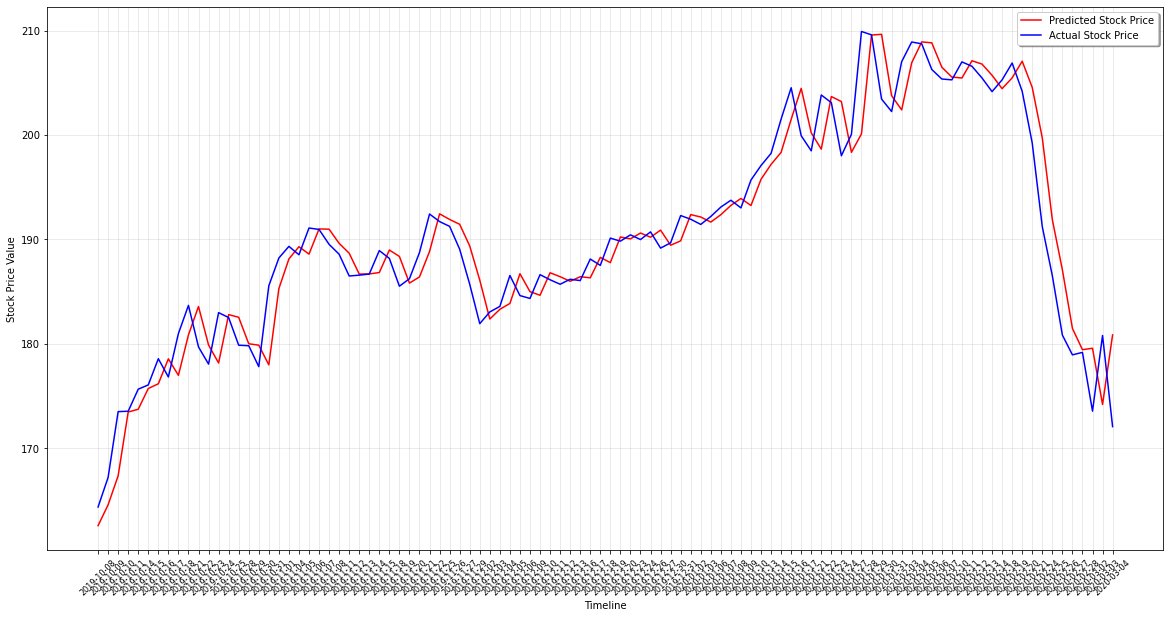

Train mae: 0.5341606714466977
Train rmse: 1.1445268473564556
mae: 0.5547265748845667
rmse: 1.288694642365367
mape: 0.013488583173464018


'GL'

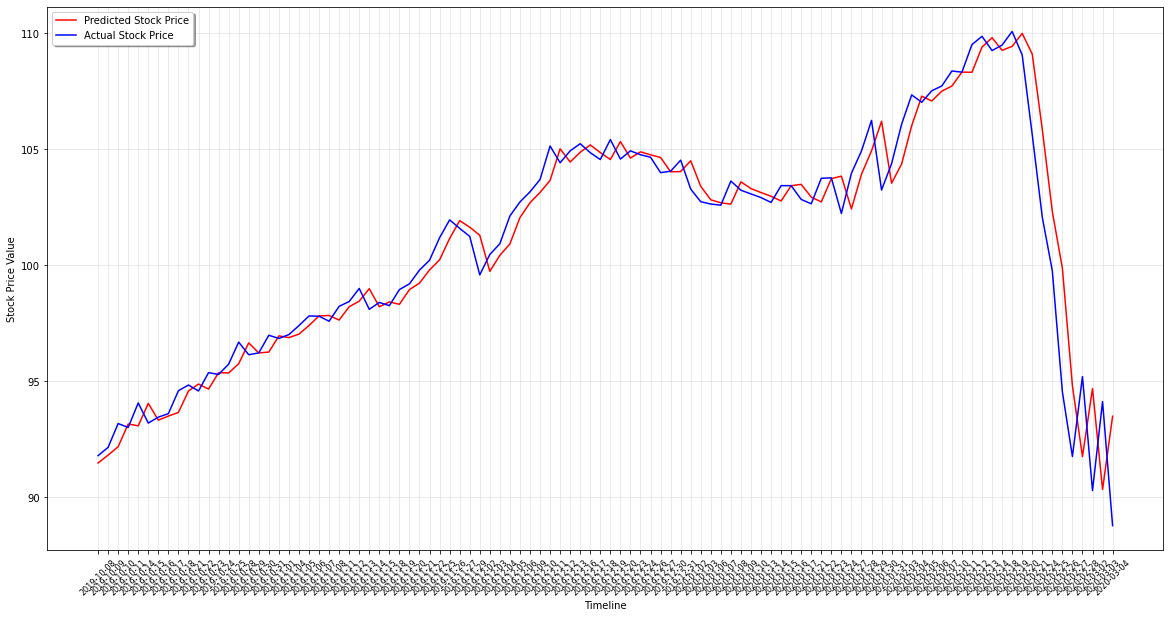

Train mae: 0.2477412986770827
Train rmse: 0.5292999649718892
mae: 0.2681700058129904
rmse: 0.6251903995200295
mape: 0.012473456486391756


'PEP'

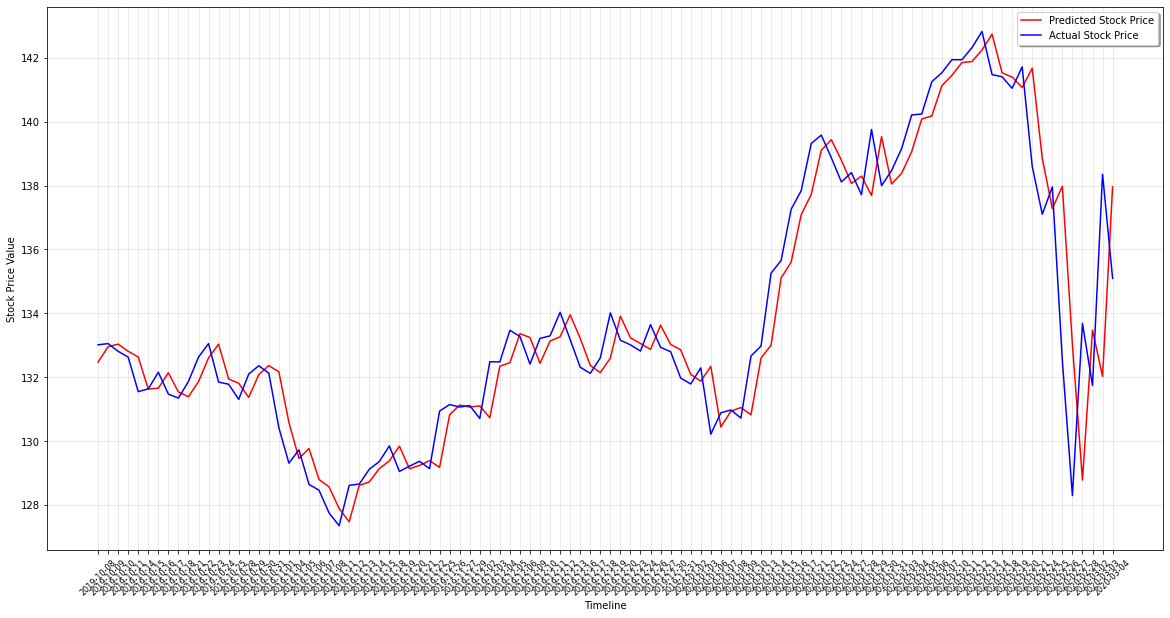

Train mae: 0.328855207225582
Train rmse: 0.6332296706448758
mae: 0.359072202589887
rmse: 0.7447463098875152
mape: 0.010880262525953041


'BDX'

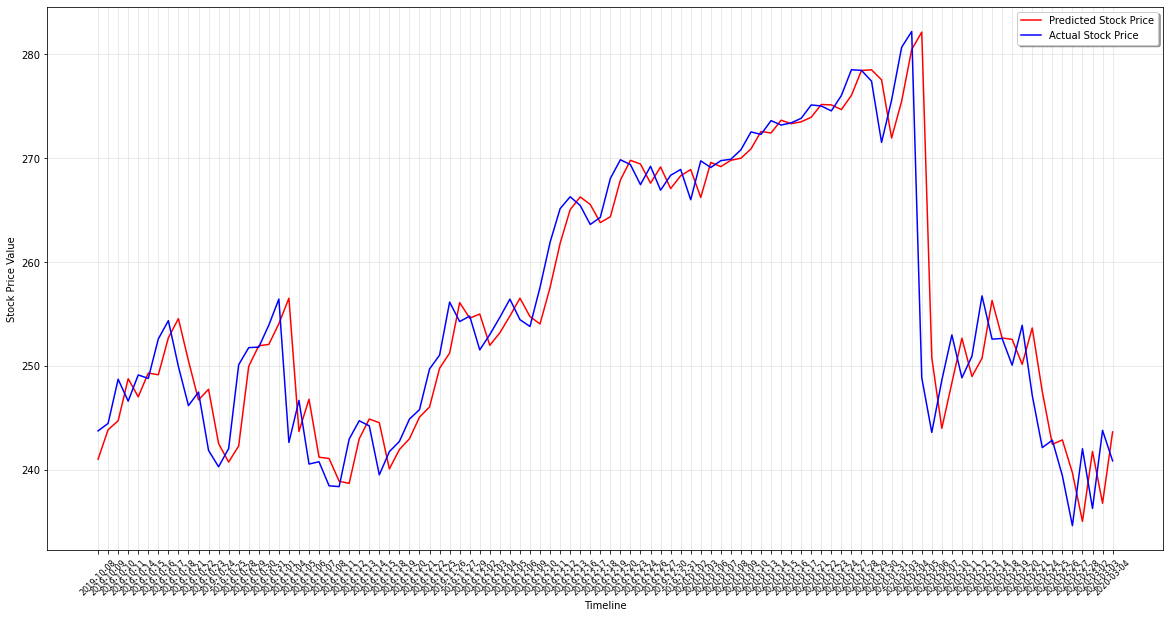

Train mae: 0.5919373907560485
Train rmse: 1.3689305159763459
mae: 0.6172360993145918
rmse: 1.4056391803521207
mape: 0.011430282161950191


'IBM'

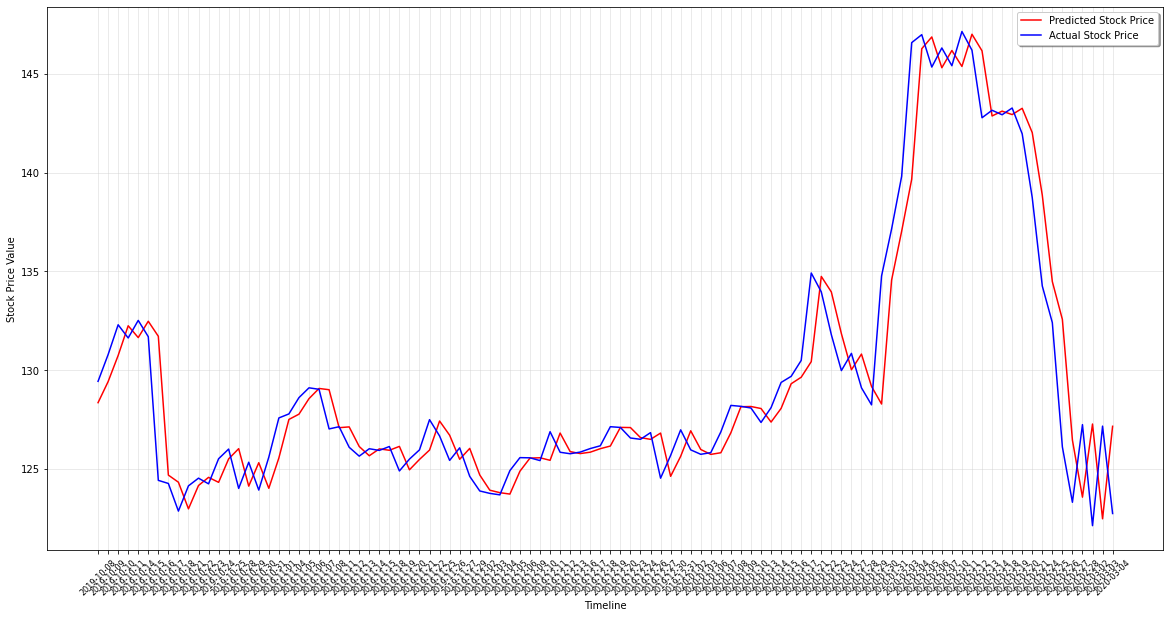

Train mae: 0.6805222341284209
Train rmse: 1.1495311688703282
mae: 0.7420734229573097
rmse: 1.3017719690700646
mape: 0.01223352558497634


In [8]:
codeM.allStock(data, svr, 8, isScaled=True)